# Trying some fast gp

In [1]:
import os 
import sys
import pandas as pd 
import numpy as np
import glob

from sklearn.model_selection import train_test_split

In [12]:
os.listdir('task_store/')

['gp_experiment_task_3_wisconsin.csv',
 'gp_experiment_task_1_mammo_graphic.csv',
 'gp_experiment_task_0_ionosphere.csv',
 'gp_experiment_task_2_cleveland.csv']

In [47]:
results = {}
for fn in os.listdir('task_store/'):
    results[fn] = pd.read_csv(f'task_store/{fn}', index_col=False)
results['gp_experiment_task_3_wisconsin.csv'].head()

,Unnamed: 0,training,seed,time,full_acc,full_tpr,full_tnr
0,0,True,0,198.728646,0.979079,1.000000,0.967846
1,1,False,0,198.728646,0.965854,0.986111,0.954887
2,2,True,169,157.558558,0.985356,1.000000,0.977492
3,3,False,169,157.558558,0.980488,1.000000,0.969925
4,4,True,338,173.840895,0.979079,1.000000,0.967846


# First looking at TPR vs FPR for each dataset

### Training

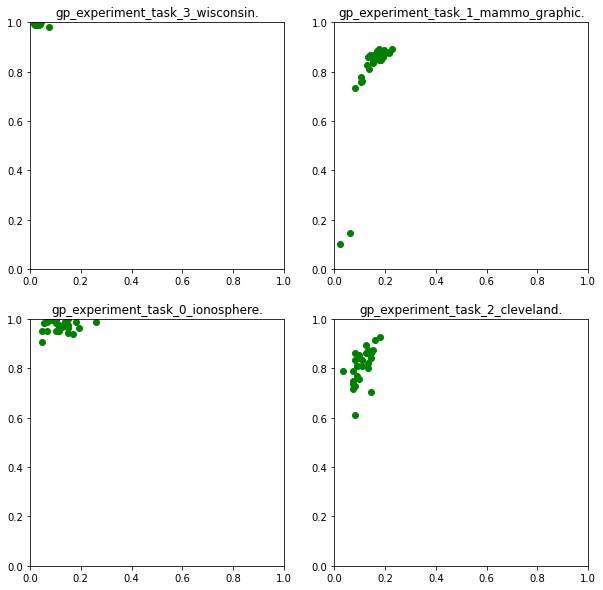

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

ind = [[0,0],[0,1],[1,0],[1,1]]
for i,fn in enumerate(os.listdir('task_store')):
    ax = axs[ind[i][0], ind[i][1]]
    df = results[fn]
    df = df.loc[df['training'] == True]
    ax.scatter(1 - df['full_tnr'].to_numpy(), df['full_tpr'].to_numpy(), color='green')
    ax.set_title(fn.replace('csv',''))
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

### Test

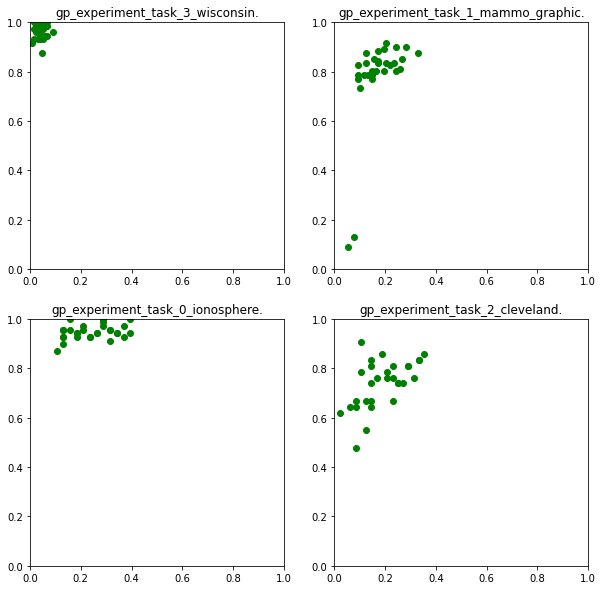

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

ind = [[0,0],[0,1],[1,0],[1,1]]
for i,fn in enumerate(os.listdir('task_store')):
    ax = axs[ind[i][0], ind[i][1]]
    df = results[fn]
    df = df.loc[df['training'] == False]
    ax.scatter(1 - df['full_tnr'].to_numpy(), df['full_tpr'].to_numpy(), color='green')
    ax.set_title(fn.replace('csv',''))
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

# How long were run times?

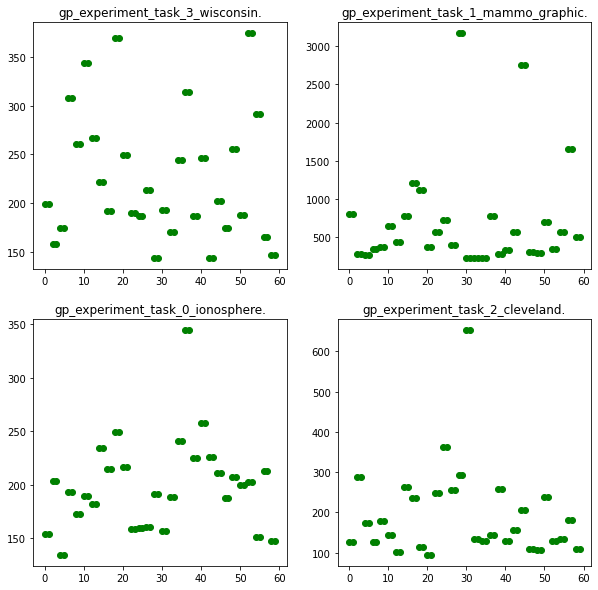

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

ind = [[0,0],[0,1],[1,0],[1,1]]
for i,fn in enumerate(os.listdir('task_store')):
    ax = axs[ind[i][0], ind[i][1]]
    df = results[fn]
    ax.scatter(np.arange(60), df['time'].to_numpy(), color='green')
    ax.set_title(fn.replace('csv',''))

# Code Architechture 

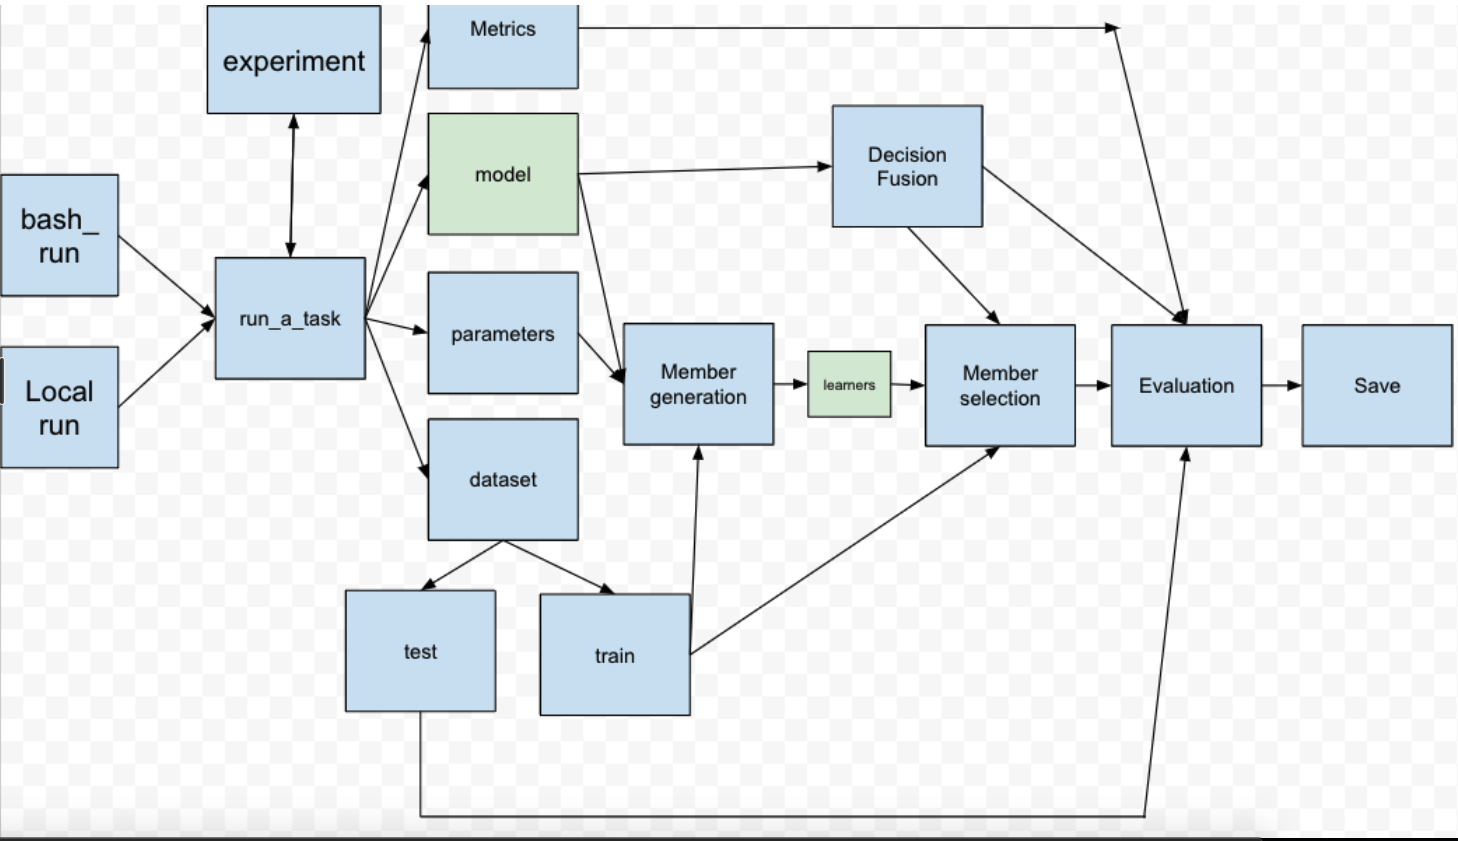

# Questions for the meeting.
- Based on this GP experiment, what ammendments need to be made? What visualisations should we aim for, learning curves, etc. 
    - More datasets?
- Things we try.
    - NEw objective function + full acc
    - New objective function + acc PER CLASS
  
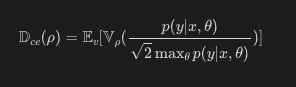